# Copy train/tests folders
To avoid uploading large file size, the train, test1, and test2 folders are removed from our submissions.
Please kindly help to copy the folder train, test1, and test1 to this project folder (same location as this file).

# Dependency Installations
Please refer to the file `requirements.txt` for the list of packages used in this program. Some of the specific machine learning libraries, there will be codes regarding installations. However, for those common libraries (such as numpy, matplotlib, etc), we assumed that already available.

# Instructions
Please run the following sections starting from Splitting data until before the Training.
If you would like to continue the training process please consider increase the `max_iter` key in the configuration variable. If you do not want to run the training, it just run through the train section, it will skip the training since we've done the training.

Most of the data was pre-processed so will execute quickly. Those take longer time there was the time recorded using %timeit to let the users know how long it may take.

# Detectron2 installations
Make sure to install detectron2 and its dependencies by enabling the following lines if you haven't done so.


In [1]:
# # install dependencies:
# !pip install pycocotools>=2.0.1
# import torch
# print(torch.__version__, torch.cuda.is_available())
# !gcc --version
# # Make sure also to install opencv (assumed to be pre-installed)
# # install detectron2: (Colab has CUDA 10.1 + torch 1.6)
# # See https://detectron2.readthedocs.io/tutorials/install.html for instructions
# assert torch.__version__.startswith("1.6")
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

# Splitting data

The stratify is by country and then by the damage type with lowest number of occurences.

In [2]:
 %load_ext autotime

In [3]:
from data_processing import split_train_data, process_tests, load_train_eval_splits, load_tests
import warnings
warnings.filterwarnings("ignore")

time: 963 ms


In [4]:
# Process train/evaluation splits
split_train_data()

Records for train split exists
Records for evaluation split exists
time: 375 µs


In [5]:
# Process tests
process_tests(["test1", "test2"])

test1 exists
test2 exists
time: 1.06 ms


# Loading the processed data

In [6]:
train_dicts, eval_dicts = load_train_eval_splits()
test1_dicts, test2_dicts = load_tests()

time: 111 ms


In [7]:
print(len(train_dicts), len(eval_dicts), len(test1_dicts), len(test2_dicts))

10974 1221 2631 2664
time: 975 µs


# Data Exploration
See split balance

In [8]:
from vis_utils import plot_damage_distributions

time: 194 ms


0 : 5923
1 : 3992
2 : 7513
3 : 5044


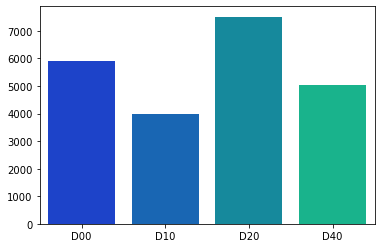

time: 129 ms


In [9]:
train_counts = plot_damage_distributions(train_dicts)

In [10]:
train_counts

[5923, 3992, 7513, 5044]

time: 3.91 ms


0 : 669
1 : 454
2 : 868
3 : 583


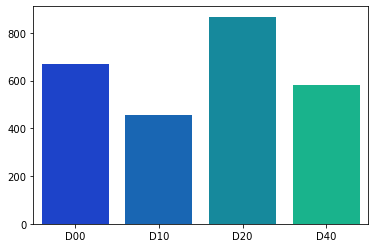

time: 101 ms


In [11]:
eval_counts = plot_damage_distributions(eval_dicts)

In [12]:
eval_counts

[669, 454, 868, 583]

time: 3.29 ms


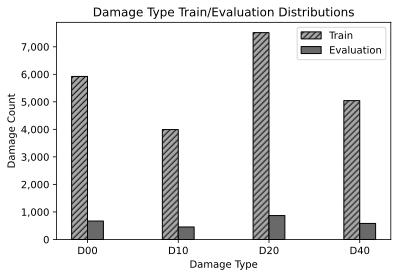

time: 116 ms


In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format ="svg"
# plt.rcParams['figure.dpi'] = 310
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(0, 8, 2)

train_plt = ax.bar(index, train_counts, bar_width, label="Train", color='darkgrey', hatch="////", edgecolor='black')
eval_plt = ax.bar(index + bar_width, eval_counts, bar_width, label="Evaluation", color='dimgrey',  edgecolor='black')

ax.set_xlabel('Damage Type')
ax.set_ylabel('Damage Count')
ax.set_title('Damage Type Train/Evaluation Distributions')
ax.set_xticks(index + 0.5*bar_width)
ax.set_xticklabels(['D00', 'D10', 'D20', 'D40'])

ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.legend()
plt.show()

See the area distribution

In [20]:
import copy
train_annos = []
for train_dict in train_dicts:
    train_annos += copy.deepcopy(train_dict['annotations'])

time: 182 ms


In [21]:
len(train_annos)

22472

time: 3.35 ms


In [22]:
import numpy as np
bboxes = np.array([anno['bbox'] for anno in train_annos])

time: 36.9 ms


In [23]:
damage_types = np.array([anno['category_id'] for anno in train_annos])

time: 9.7 ms


In [24]:
areas = (bboxes[:, 2]-bboxes[:, 0])*(bboxes[:, 3]-bboxes[:, 1])

time: 1.74 ms


In [25]:
len(areas)

22472

time: 2.84 ms


In [26]:
sizes = np.sqrt(areas)

time: 3.35 ms


In [27]:
len(sizes)

22472

time: 3.99 ms


In [28]:
# Plot the area distribution
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

time: 832 µs


(array([4.420e+03, 7.678e+03, 3.734e+03, 2.158e+03, 1.531e+03, 1.138e+03,
       8.410e+02, 6.450e+02, 1.860e+02, 7.300e+01, 4.200e+01, 1.200e+01,
       1.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 5.000e+00, 0.000e+00,
       0.000e+00, 2.000e+00]), array([  0.        ,  45.68005582,  91.36011165, 137.04016747,
       182.72022329, 228.40027912, 274.08033494, 319.76039076,
       365.44044658, 411.12050241, 456.80055823, 502.48061405,
       548.16066988, 593.8407257 , 639.52078152, 685.20083735,
       730.88089317, 776.56094899, 822.24100482, 867.92106064,
       913.60111646]), <BarContainer object of 20 artists>)


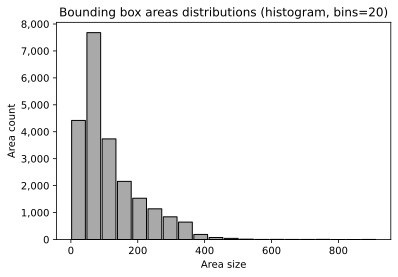

time: 135 ms


In [43]:
index = np.arange(20)
fig, ax = plt.subplots()
ret = ax.hist(sizes, bins=20, rwidth=0.9, color='darkgrey', edgecolor='black')
ax.set_xlabel('Area size')
ax.set_ylabel('Area count')
ax.set_title('Bounding box areas distributions (histogram, bins=20)')
# ax.set_xticks(index + bar_width)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
print(ret)

So we will choose the sizes as [32, 64, 128, 256]

In [45]:
widths = bboxes[:, 2] - bboxes[:, 0]
heights = bboxes[:, 3] - bboxes[:, 1]

time: 2.44 ms


In [46]:
widths.min()

0

time: 3.69 ms


In [47]:
np.where(widths==0)

(array([12039]),)

time: 3.73 ms


In [48]:
np.where(heights==0)

(array([], dtype=int64),)

time: 4.21 ms


In [49]:
# ratio is H/W
ratios = (bboxes[:, 3] - bboxes[:, 1] + 1)/(bboxes[:, 2]-bboxes[:, 0]+1) # + 1 is to avoid the divided by zero

time: 2.34 ms


In [50]:
ratios.max()

16.53846153846154

time: 3.65 ms


In [51]:
ratios.min()

0.046228710462287104

time: 3.37 ms


(array([9.781e+03, 7.371e+03, 2.805e+03, 1.225e+03, 6.080e+02, 3.100e+02,
       1.660e+02, 7.800e+01, 4.600e+01, 3.100e+01, 2.200e+01, 1.300e+01,
       5.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]), array([ 0.04622871,  0.5959698 ,  1.1457109 ,  1.69545199,  2.24519309,
        2.79493418,  3.34467528,  3.89441637,  4.44415746,  4.99389856,
        5.54363965,  6.09338075,  6.64312184,  7.19286294,  7.74260403,
        8.29234512,  8.84208622,  9.39182731,  9.94156841, 10.4913095 ,
       11.0410506 , 11.59079169, 12.14053278, 12.69027388, 13.24001497,
       13.78975607, 14.33949716, 14.88923826, 15.43897935, 15.98872044,
       16.53846154]), <BarContainer object of 30 artists>)


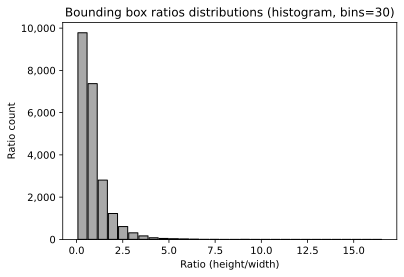

time: 135 ms


In [55]:
index = np.arange(30)
fig, ax = plt.subplots()
ret = ax.hist(ratios, bins=30, rwidth=0.9, color='darkgrey', edgecolor='black')
ax.set_xlabel('Ratio (height/width)')
ax.set_ylabel('Ratio count')
ax.set_title('Bounding box ratios distributions (histogram, bins=30)')
# ax.set_xticks(index + bar_width)
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
print(ret)

In [56]:
0.5959698 - 0.04622871

0.54974109

time: 3.05 ms


So we will choose 0.1, 0.5, 1.0, 1.5